<a href="https://colab.research.google.com/github/upekshadhananji/b/blob/main/SQL_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Research_Dataset.csv to Research_Dataset (1).csv


In [ ]:
df = pd.read_csv('Research_Dataset.csv', encoding='ISO-8859-1')

In [ ]:
# Step 3: Count based on cleaned values
status_counts = df['Vulnerability Status'].value_counts()

print("Before Removing Duplicates (based on Code Snippets):")
print(f"Vulnerability Status - Yes: {status_counts.get('yes', 0)}")
print(f"Vulnerability Status - No: {status_counts.get('no', 0)}")



Before Removing Duplicates (based on Code Snippets):
Vulnerability Status - Yes: 1010
Vulnerability Status - No: 604


In [ ]:
# Remove duplicates based on the 'Code Snippets' column
df_cleaned = df.drop_duplicates(subset='Code Snippets', keep='first')

In [ ]:
# Remove duplicates based on code snippets
df_unique = df.drop_duplicates(subset='Code Snippets')

# Count the values of the 'Vulnerability Status' or 'vulnerability_label' column
# Adjust column name depending on your dataset
status_counts_after = df_unique['Vulnerability Status'].value_counts()

print("\nAfter Removing Duplicates (based on Code Snippets):")
print(f"Vulnerability Status - Yes (0): {status_counts_after.get(1, 0)}")
print(f"Vulnerability Status - No (1): {status_counts_after.get(0, 0)}")



After Removing Duplicates (based on Code Snippets):
Vulnerability Status - Yes (0): 456
Vulnerability Status - No (1): 734


<ipython-input-54-a2f834bdac47>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Vulnerability Status - Yes (0): {status_counts_after.get(1, 0)}")
<ipython-input-54-a2f834bdac47>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Vulnerability Status - No (1): {status_counts_after.get(0, 0)}")


In [ ]:
# Save to new CSV file
df_cleaned.to_csv('Cleaned_Research_Dataset.csv', index=False)

# Download it
from google.colab import files
files.download('Cleaned_Research_Dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install javalang

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Research_Dataset.csv to Cleaned_Research_Dataset (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv("Cleaned_Research_Dataset.csv")

In [ ]:
import re

# Function to tokenize Java code
def tokenize_code(code):
    # Basic regex-based tokenizer for Java
    tokens = re.findall(r"[A-Za-z_]\w*|==|!=|<=|>=|[(){}.;,+\-*/%<>=\"\[\]]", str(code))
    return tokens

# Apply tokenizer to each code snippet
df['Tokens'] = df['Code Snippets'].apply(tokenize_code)

# Preview one row
print("Original Snippet:")
print(df['Code Snippets'].iloc[0])
print("\nTokens:")
print(df['Tokens'].iloc[0])


Original Snippet:
String propName = ParamUtils.getParameter(request,"propName");

Tokens:
['String', 'propName', '=', 'ParamUtils', '.', 'getParameter', '(', 'request', ',', '"', 'propName', '"', ')', ';']


In [ ]:
df.head()

,Code File Number,Code Line Number,Code Snippets,Vulnerability Status,Vulnerability Type,Issue,tokenized_code,Tokens
0,5,56,String propName = ParamUtils.getParameter(requ...,yes,SQL Injection,Unsanitized Input Leads to SQL Injection Risk,String propName ParamUtils getParameter reques...,"[String, propName, =, ParamUtils, ., getParame..."
1,5,57,String propValue = ParamUtils.getParameter(req...,yes,SQL Injection,No Input Size Validation for Large Values,String propValue ParamUtils getParameter reque...,"[String, propValue, =, ParamUtils, ., getParam..."
2,6,25,"String query = ""SELECT * FROM users WHERE user...",yes,SQL Injection,Unvalidated user input in SQL query,String query SELECT FROM users WHERE user user,"[String, query, =, "", SELECT, *, FROM, users, ..."
3,8,193,session.getMethod();,yes,SQL Injection,Query method vulnerability,session getMethod,"[session, ., getMethod, (, ), ;]"
4,8,107,session.parseBody(bodyFiles),yes,SQL Injection,Insufficient validation,session parseBody bodyFiles,"[session, ., parseBody, (, bodyFiles, )]"


In [ ]:
# Save to a new CSV file
df.to_csv('Tokenized_Research_Dataset.csv', index=False)

# Download the file
files.download('Tokenized_Research_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tokenized_Research_Dataset.csv to Tokenized_Research_Dataset.csv


In [3]:
# Load the dataset
df = pd.read_csv('Tokenized_Research_Dataset.csv')

# View column names to find 'Tokens' and 'Vulnerability Status'
print(df.columns)


Index(['Code File Number', 'Code Line Number', 'Code Snippets',
       'Vulnerability Status', 'Vulnerability Type', 'Issue', 'tokenized_code',
       'Tokens'],
      dtype='object')


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your DataFrame (df)
# df = pd.read_csv('your_file.csv')  # if needed

# Drop rows with missing Tokens or Vulnerability Status
df = df.dropna(subset=['Tokens', 'Vulnerability Status'])

# Features and Labels
X_raw = df['Tokens']
y = df['Vulnerability Status']

# Vectorize the tokens
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)

# Train-test split (with stratify to maintain label balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8487394957983193

Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.65      0.77        91
         yes       0.82      0.97      0.89       147

    accuracy                           0.85       238
   macro avg       0.88      0.81      0.83       238
weighted avg       0.86      0.85      0.84       238



In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [10]:
logreg = LogisticRegression(max_iter=1000)  # max_iter for convergence
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.865546218487395

Classification Report:
               precision    recall  f1-score   support

          no       1.00      0.64      0.78        88
         yes       0.82      1.00      0.90       150

    accuracy                           0.87       238
   macro avg       0.91      0.82      0.84       238
weighted avg       0.89      0.87      0.86       238



In [12]:
import joblib

joblib.dump(logreg, 'logistic_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8991596638655462
              precision    recall  f1-score   support

          no       0.92      0.80      0.85        88
         yes       0.89      0.96      0.92       150

    accuracy                           0.90       238
   macro avg       0.90      0.88      0.89       238
weighted avg       0.90      0.90      0.90       238



In [15]:
import re
import joblib

# Load trained model and vectorizer
model = joblib.load('logistic_model.pkl')              # Make sure it's trained to classify 'yes'/'no'
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to preprocess code
def preprocess_code(code):
    code = re.sub(r'//.*|/\*[\s\S]*?\*/', '', code)  # Remove comments
    tokens = re.findall(r'\b\w+\b', code)            # Extract words/tokens
    return ' '.join(tokens)

# Function to predict vulnerability status
def predict_vulnerability_status(code_input):
    cleaned_code = preprocess_code(code_input)
    vector = vectorizer.transform([cleaned_code])
    prediction = model.predict(vector)[0]  # Result is 'yes' or 'no'

    if prediction.lower() == 'yes':
        print("🔴 Vulnerable")
    elif prediction.lower() == 'no':
        print("🟢 Secure")
    else:
        print("⚠️ Unknown prediction:", prediction)

# === EXAMPLE USAGE ===
if __name__ == "__main__":
    java_code = """
String query = "SELECT * FROM users WHERE username = ? AND password = ?";
PreparedStatement stmt = connection.prepareStatement(query);
stmt.setString(1, username);
stmt.setString(2, password);
ResultSet rs = stmt.executeQuery();



    """
    predict_vulnerability_status(java_code)


🟢 Secure


In [16]:
import joblib

# Save the trained model (change 'model' to your model's variable name)
joblib.dump(model, 'logistic_regression_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

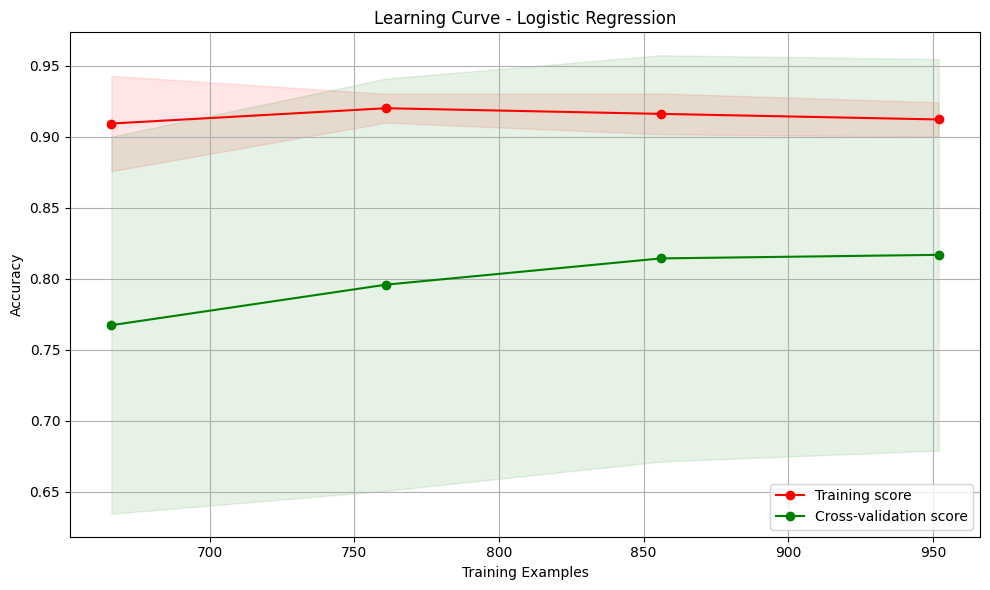

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming df is already preprocessed and available
# And you have already done:
# df = df.dropna(subset=['Tokens', 'Vulnerability Status'])

X_raw = df['Tokens']
y = df['Vulnerability Status']

# Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Mean and std deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [22]:
TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, min_df=5, max_features=10000)


TfidfVectorizer(max_df=0.8, max_features=10000, min_df=5, ngram_range=(1, 2))

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),     # Unigrams + bigrams
    max_df=0.8,             # Ignore terms that appear in >80% of documents
    min_df=5,               # Ignore terms that appear in <5 documents
    max_features=10000      # Limit vocabulary size
)

X = vectorizer.fit_transform(X_raw)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [26]:
from sklearn.metrics import accuracy_score

best_model = grid_search.best_estimator_
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9380252100840336
Test Accuracy: 0.8781512605042017


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

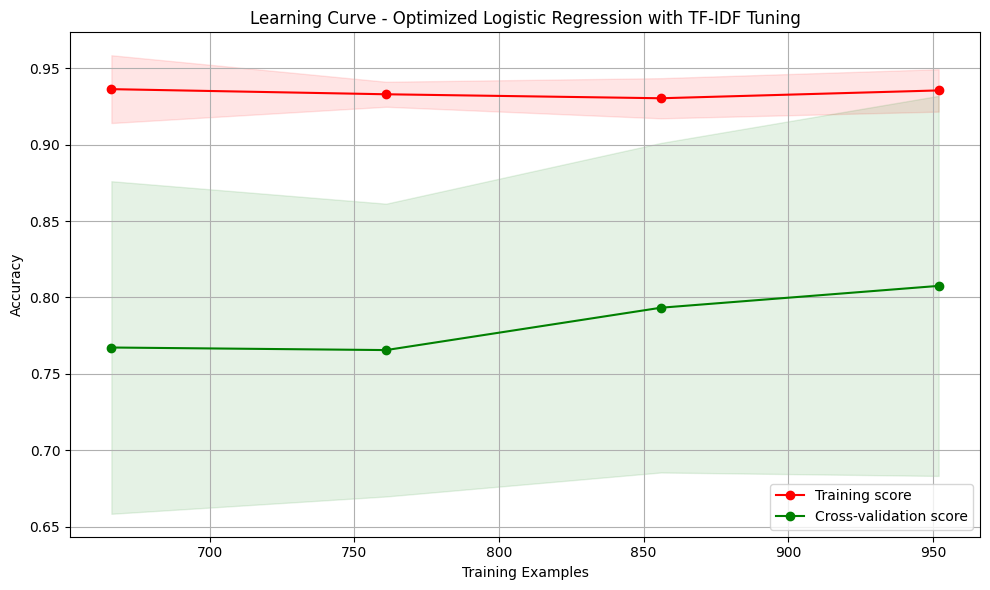

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve - Optimized Logistic Regression with TF-IDF Tuning")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [29]:
import re
import joblib

# Load trained model and vectorizer
model = joblib.load('logistic_model.pkl')              # Make sure it's trained to classify 'yes'/'no'
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to preprocess code
def preprocess_code(code):
    code = re.sub(r'//.*|/\*[\s\S]*?\*/', '', code)  # Remove comments
    tokens = re.findall(r'\b\w+\b', code)            # Extract words/tokens
    return ' '.join(tokens)

# Function to predict vulnerability status
def predict_vulnerability_status(code_input):
    cleaned_code = preprocess_code(code_input)
    vector = vectorizer.transform([cleaned_code])
    prediction = model.predict(vector)[0]  # Result is 'yes' or 'no'

    if prediction.lower() == 'yes':
        print("🔴 Vulnerable")
    elif prediction.lower() == 'no':
        print("🟢 Secure")
    else:
        print("⚠️ Unknown prediction:", prediction)

# === EXAMPLE USAGE ===
if __name__ == "__main__":
    java_code = """
String query = "SELECT * FROM users WHERE username = ? AND password = ?";
PreparedStatement stmt = connection.prepareStatement(query);
stmt.setString(1, username);
stmt.setString(2, password);
ResultSet rs = stmt.executeQuery();



    """
    predict_vulnerability_status(java_code)


🟢 Secure
